# Import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [3]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [4]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
profiles = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [5]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(profiles.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [6]:
pillars = pd.read_excel(file_path, sheet_name="dim_competency_pillars")

dim_grades = pd.read_excel(file_path, sheet_name="dim_grades")
dim_directorates = pd.read_excel(file_path, sheet_name="dim_directorates")
dim_divisions = pd.read_excel(file_path, sheet_name="dim_divisions")
dim_departments = pd.read_excel(file_path, sheet_name="dim_departments")
dim_positions = pd.read_excel(file_path, sheet_name="dim_positions")
dim_education = pd.read_excel(file_path, sheet_name="dim_education")
dim_majors = pd.read_excel(file_path, sheet_name="dim_majors")
dim_areas = pd.read_excel(file_path, sheet_name="dim_areas")
dim_companies = pd.read_excel(file_path, sheet_name="dim_companies")


In [7]:
# Buat dictionary mapping dari setiap tabel dimensi
map_company = dict(zip(dim_companies["company_id"], dim_companies["name"]))
map_area = dict(zip(dim_areas["area_id"], dim_areas["name"]))
map_position = dict(zip(dim_positions["position_id"], dim_positions["name"]))
map_department = dict(zip(dim_departments["department_id"], dim_departments["name"]))
map_division = dict(zip(dim_divisions["division_id"], dim_divisions["name"]))
map_directorate = dict(zip(dim_directorates["directorate_id"], dim_directorates["name"]))
map_grade = dict(zip(dim_grades["grade_id"], dim_grades["name"]))
map_education = dict(zip(dim_education["education_id"], dim_education["name"]))
map_major = dict(zip(dim_majors["major_id"], dim_majors["name"]))

# Duplikasi data asli agar tidak mengubah 'employees'
employees_name = employees.copy()

# Mapping ID → Nama
employees_name["company_id"] = employees_name["company_id"].map(map_company)
employees_name["area_id"] = employees_name["area_id"].map(map_area)
employees_name["position_id"] = employees_name["position_id"].map(map_position)
employees_name["department_id"] = employees_name["department_id"].map(map_department)
employees_name["division_id"] = employees_name["division_id"].map(map_division)
employees_name["directorate_id"] = employees_name["directorate_id"].map(map_directorate)
employees_name["grade_id"] = employees_name["grade_id"].map(map_grade)
employees_name["education_id"] = employees_name["education_id"].map(map_education)
employees_name["major_id"] = employees_name["major_id"].map(map_major)

# Ubah nama kolom menjadi lebih deskriptif
employees_name = employees_name.rename(columns={
    "company_id": "company_name",
    "area_id": "area_name",
    "position_id": "position_name",
    "department_id": "department_name",
    "division_id": "division_name",
    "directorate_id": "directorate_name",
    "grade_id": "grade_name",
    "education_id": "education_name",
    "major_id": "major_name"
})

display(employees_name.head())


,employee_id,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


# EDA

# Outlier Score

### Performance

In [8]:
performance

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021
...,...,...,...
10045,DUP1942,5.0,2025
10046,DUP2096,3.0,2025
10047,DUP4177,2.0,2025
10048,DUP9801,5.0,2025


In [9]:
rating_performance = pd.DataFrame({
    'Jumlah': performance['rating'].value_counts().sort_index(),
    'Persentase (%)': (performance['rating'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_performance)

,Jumlah,Persentase (%)
rating,,
0.0,15,0.17
1.0,672,7.52
2.0,1578,17.65
3.0,3339,37.34
4.0,2437,27.25
5.0,881,9.85
6.0,13,0.15
99.0,7,0.08


C:\Users\fajar\AppData\Local\Temp\ipykernel_35092\1816126311.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')


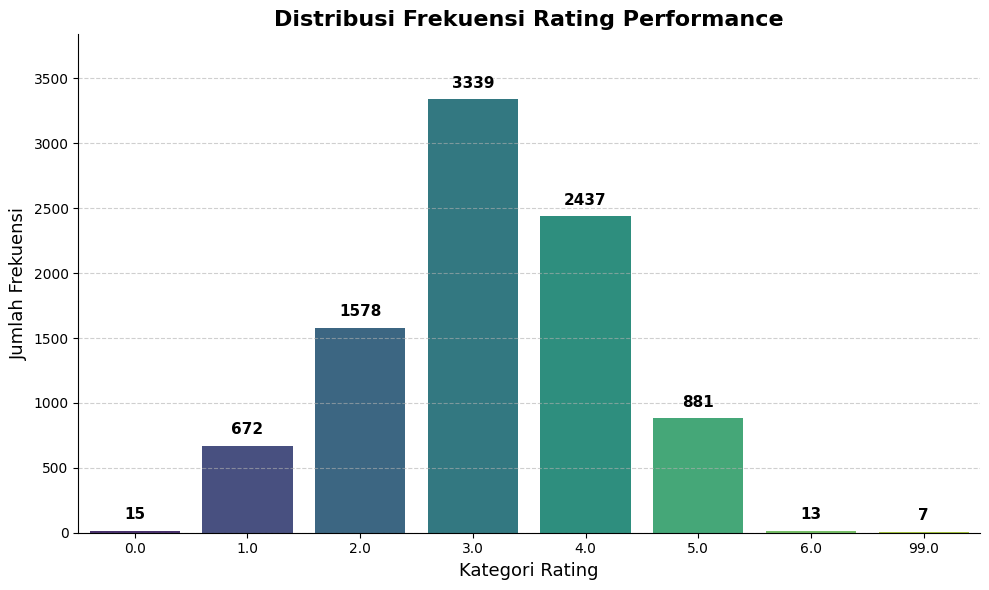

In [10]:
# Hitung frekuensi nilai rating
rating_counts = performance['rating'].value_counts().sort_index()
df_counts = rating_counts.reset_index()
df_counts.columns = ['Rating', 'Jumlah']

# Plot distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi Rating Performance', fontsize=16, weight='bold')
plt.xlabel('Kategori Rating', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [11]:
# --- Duplikasi dataframe agar data asli tetap aman ---
performance_clean = performance.copy()

# Ganti nilai di luar 1–5 menjadi NaN
performance_clean.loc[
    (performance_clean['rating'] < 1) | (performance_clean['rating'] > 5),
    'rating'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi rating setelah pembersihan:\n")
print(performance_clean['rating'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = performance_clean['rating'].isna().sum()
print(f"\nJumlah nilai rating yang diubah menjadi NaN: {num_nan}")



Distribusi rating setelah pembersihan:

rating
1.0     672
2.0    1578
3.0    3339
4.0    2437
5.0     881
NaN    1143
Name: count, dtype: int64

Jumlah nilai rating yang diubah menjadi NaN: 1143


### Competencies

In [12]:
competencies

,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021
...,...,...,...,...
100495,DUP1942,5.0,CSI,2025
100496,DUP2096,3.0,CSI,2025
100497,DUP4177,2.0,CSI,2025
100498,DUP9801,5.0,CSI,2025


In [13]:
rating_competencies = pd.DataFrame({
    'Jumlah': competencies['score'].value_counts().sort_index(),
    'Persentase (%)': (competencies['score'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_competencies)

,Jumlah,Persentase (%)
score,,
0.0,163,0.18
1.0,8688,9.68
2.0,17857,19.91
3.0,28206,31.44
4.0,22936,25.57
5.0,11523,12.84
6.0,165,0.18
99.0,171,0.19


C:\Users\fajar\AppData\Local\Temp\ipykernel_35092\4186793133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')


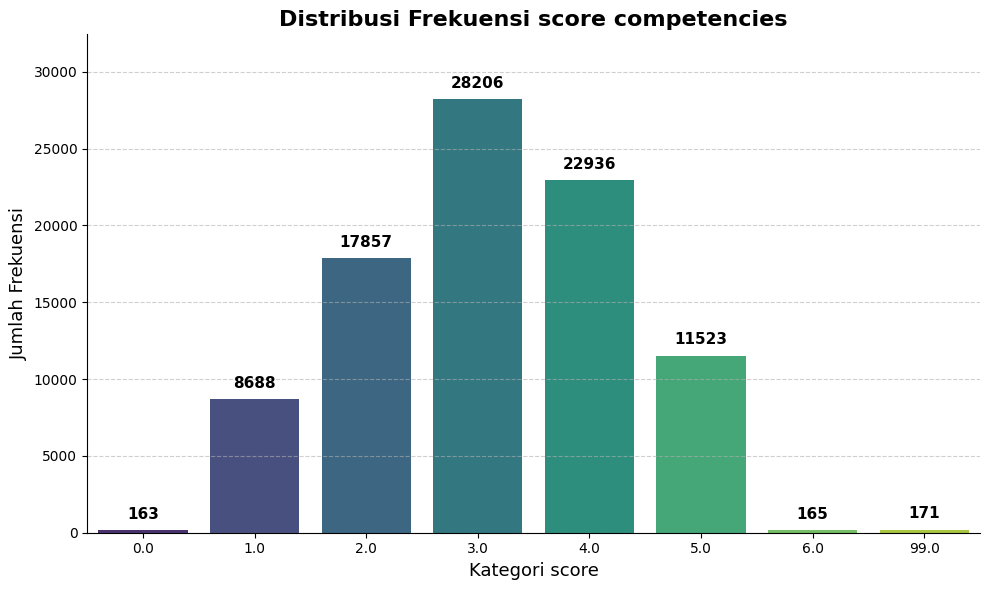

In [14]:
# Hitung frekuensi nilai score
score_counts = competencies['score'].value_counts().sort_index()
df_counts = score_counts.reset_index()
df_counts.columns = ['score', 'Jumlah']

# Plot distribusi score
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi score competencies', fontsize=16, weight='bold')
plt.xlabel('Kategori score', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [15]:
# --- Duplikasi dataframe agar data asli tetap aman ---
competencies_clean = competencies.copy()

# Ganti nilai di luar 1–5 menjadi NaN
competencies_clean.loc[
    (competencies_clean['score'] < 1) | (competencies_clean['score'] > 5),
    'score'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi score setelah pembersihan:\n")
print(competencies_clean['score'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = competencies_clean['score'].isna().sum()
print(f"\nJumlah nilai score yang diubah menjadi NaN: {num_nan}")



Distribusi score setelah pembersihan:

score
1.0     8688
2.0    17857
3.0    28206
4.0    22936
5.0    11523
NaN    11290
Name: count, dtype: int64

Jumlah nilai score yang diubah menjadi NaN: 11290


## Contextual factors

In [16]:
performance_employees_name = (
    performance_clean
    .merge(employees_name, on="employee_id", how="left")
)
display(performance_employees_name.head())

,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,NaN,2021,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


In [17]:
performance_employees = (
    performance_clean
    .merge(employees, on="employee_id", how="left")
)
display(performance_employees.head())

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [18]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees_name['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees_name['years_of_service_adjusted'] = (
    performance_employees_name['years_of_service_months']
    - (LATEST_YEAR - performance_employees_name['year']) * 12
)

# Tampilkan hasil
display(performance_employees_name.head())


,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64,16
1,EMP100001,NaN,2021,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16,-32
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58,10
3,EMP100003,NaN,2021,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15,-33
4,EMP100004,3.0,2021,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34,-14


In [19]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees['years_of_service_adjusted'] = (
    performance_employees['years_of_service_months']
    - (LATEST_YEAR - performance_employees['year']) * 12
)

# Tampilkan hasil
display(performance_employees.head())


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,16
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16,-32
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58,10
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15,-33
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34,-14


In [20]:
corr_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id',
    'years_of_service_adjusted',
    'rating'
]

corr_vars_name = [
    'company_name',
    'area_name',
    'position_name',
    'department_name',
    'division_name',
    'directorate_name',
    'grade_name',
    'education_name',
    'major_name',
    'years_of_service_adjusted',
    'rating'
]

In [21]:
import numpy as np
import pandas as pd
from scipy import stats

df = performance_employees.copy()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print("Missing per var:\n", df[corr_vars].isna().mean())


Missing per var:
 company_id                   0.000000
area_id                      0.000000
position_id                  0.000000
department_id                0.000000
division_id                  0.000000
directorate_id               0.000000
grade_id                     0.000000
education_id                 0.000000
major_id                     0.000000
years_of_service_adjusted    0.000000
rating                       0.113731
dtype: float64


In [22]:
# drop kolom yang tidak relevan (numerik dan target)
corr_vars_cat = [c for c in corr_vars if c not in [
    'years_of_service_adjusted',
    'rating'
]]

# tambahkan kolom target biner
df['is_high'] = (df['rating'] == 5).astype(int)

for cat in corr_vars_cat:
    out = (df.groupby(cat)['is_high']
             .agg(['sum','count'])
             .assign(prop=lambda x: (x['sum'] / x['count']).round(4))
             .sort_values('prop', ascending=False))
    print(f"\nTop groups by prop high performer in {cat}:")
    display(out.head(10))



Top groups by prop high performer in company_id:


,sum,count,prop
company_id,,,
4,252,2485,0.1014
2,231,2660,0.0868
1,202,2435,0.0830
3,196,2470,0.0794



Top groups by prop high performer in area_id:


,sum,count,prop
area_id,,,
2,223,2410,0.0925
3,217,2445,0.0888
1,232,2710,0.0856
4,209,2485,0.0841



Top groups by prop high performer in position_id:


,sum,count,prop
position_id,,,
3,159,1710,0.0930
4,165,1805,0.0914
5,145,1650,0.0879
6,138,1610,0.0857
2,143,1670,0.0856
1,131,1605,0.0816



Top groups by prop high performer in department_id:


,sum,count,prop
department_id,,,
4,158,1660,0.0952
3,169,1820,0.0929
1,140,1570,0.0892
5,154,1780,0.0865
2,131,1610,0.0814
6,129,1610,0.0801



Top groups by prop high performer in division_id:


,sum,count,prop
division_id,,,
2,190,1975,0.0962
3,187,2060,0.0908
4,171,2025,0.0844
5,173,2065,0.0838
1,160,1925,0.0831



Top groups by prop high performer in directorate_id:


,sum,count,prop
directorate_id,,,
3,337,3515,0.0959
2,281,3370,0.0834
1,263,3165,0.0831



Top groups by prop high performer in grade_id:


,sum,count,prop
grade_id,,,
1,309,3380,0.0914
2,294,3315,0.0887
3,278,3355,0.0829



Top groups by prop high performer in education_id:


,sum,count,prop
education_id,,,
3,259,2630,0.0985
2,229,2515,0.0911
4,202,2315,0.0873
1,191,2590,0.0737



Top groups by prop high performer in major_id:


,sum,count,prop
major_id,,,
4,161,1640,0.0982
3,172,1840,0.0935
5,147,1715,0.0857
1,135,1590,0.0849
6,138,1650,0.0836
2,128,1615,0.0793


In [23]:
import scipy.stats as stats
import numpy as np

for cat in corr_vars_cat:
    table = pd.crosstab(df[cat], df['is_high'])
    chi2, p, dof, exp = stats.chi2_contingency(table)
    n = table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
    print(f"{cat}: Cramér’s V = {cramers_v:.3f}, p = {p:.4f}")


company_id: Cramér’s V = 0.029, p = 0.0336
area_id: Cramér’s V = 0.011, p = 0.7323
position_id: Cramér’s V = 0.013, p = 0.8736
department_id: Cramér’s V = 0.019, p = 0.5781
division_id: Cramér’s V = 0.018, p = 0.5249
directorate_id: Cramér’s V = 0.021, p = 0.1022
grade_id: Cramér’s V = 0.013, p = 0.4477
education_id: Cramér’s V = 0.032, p = 0.0149
major_id: Cramér’s V = 0.022, p = 0.4115


Cramér’s V berada di kisaran 0.0–1.0
Semakin dekat ke 1 → hubungan semakin kuat

Berdasarkan hasil uji hubungan antara variabel kategorikal dengan status kinerja tinggi menggunakan uji chi-square dan Cramér’s V, seluruh variabel menunjukkan nilai asosiasi yang sangat lemah (Cramér’s V < 0.05). Meskipun beberapa variabel seperti education_id (p = 0.0149) dan company_id (p = 0.0336) signifikan secara statistik, kekuatan hubungannya tidak cukup besar untuk dianggap bermakna secara praktis. Hal ini mengindikasikan bahwa karakteristik seperti pendidikan formal, grade jabatan, maupun struktur organisasi tidak secara nyata membedakan kelompok karyawan dengan performa tinggi dari kelompok lainnya.

Dengan kata lain, performa tinggi karyawan tidak dapat dijelaskan hanya melalui faktor demografis atau struktural organisasi. Faktor lain seperti kualitas kepemimpinan, motivasi individu, budaya kerja, dan peluang pengembangan kemungkinan memiliki peran yang lebih besar dalam menentukan performa karyawan.

In [24]:
from math import isnan
num_vars = ['years_of_service_adjusted','rating']
corrs = []
for a in num_vars:
    for b in num_vars:
        if a==b: continue
        valid = df[[a,b]].dropna()
        if len(valid) < 10: 
            continue
        r, p = stats.pearsonr(valid[a], valid[b])
        corrs.append({'var1':a,'var2':b,'r':r,'p':p,'n':len(valid)})
corr_df = pd.DataFrame(corrs).sort_values('r', key=abs, ascending=False)
display(corr_df)


,var1,var2,r,p,n
0,years_of_service_adjusted,rating,0.008036,0.448286,8907
1,rating,years_of_service_adjusted,0.008036,0.448286,8907


Korelasi antara years_of_service_adjusted dan rating

Korelasi hampir nol (r = 0.010) → tidak ada hubungan linear antara lama masa kerja dan kinerja.

p-value > 0.05 → tidak signifikan.

Kesimpulan: Lama bekerja tidak menjamin kinerja tinggi

Tidak ditemukan hubungan linear yang berarti antara masa kerja dengan hasil kinerja (rating).

In [25]:
# point-biserial is equivalent to Pearson between continuous var and binary is_high
for v in ['years_of_service_adjusted']:
    valid = df[[v,'is_high']].dropna()
    r,p = stats.pointbiserialr(valid['is_high'], valid[v]) if hasattr(stats, 'pointbiserialr') else stats.pearsonr(valid[v], valid['is_high'])
    print(v, "r=", r, "p=", p, "n=", len(valid))


years_of_service_adjusted r= 0.02304317361546778 p= 0.02088315309976612 n= 10050


Berdasarkan hasil perhitungan korelasi point-biserial antara variabel masa kerja (years_of_service_adjusted) dengan status high performer (is_high), diperoleh temuan sebagai berikut:

years_of_service_adjusted menunjukkan nilai korelasi r = 0.023 dengan p = 0.0209.

Nilai r positif yang sangat kecil menandakan bahwa semakin lama masa kerja yang telah disesuaikan, cenderung sedikit meningkatkan kemungkinan karyawan menjadi high performer.

Namun, pengaruhnya sangat lemah secara praktis, meskipun signifikan secara statistik (p < 0.05).

Ini mungkin disebabkan oleh ukuran sampel yang besar (n = 10.050) sehingga perbedaan kecil menjadi signifikan.

In [27]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# variabel kategori
cat_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id'
]

# variabel numerik
num_vars = ['years_of_service_adjusted']

# gabungkan
feat = num_vars
X = df[feat].copy()
X = pd.concat([X, pd.get_dummies(df[cat_vars], drop_first=True)], axis=1)

# target
y = df['is_high']

# buang missing
mask = y.notna() & X.notna().all(axis=1)
X2 = sm.add_constant(X.loc[mask])

# model logit
model = sm.Logit(y.loc[mask], X2).fit(disp=False)

# hasil ringkasan & odds ratio
print(model.summary())
odds = np.exp(model.params)
print("\nTop 10 Odds Ratios:")
print(odds.sort_values(ascending=False).head(10))


                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                10050
Model:                          Logit   Df Residuals:                    10039
Method:                           MLE   Df Model:                           10
Date:                Fri, 24 Oct 2025   Pseudo R-squ.:                0.003153
Time:                        16:36:50   Log-Likelihood:                -2976.4
converged:                       True   LL-Null:                       -2985.8
Covariance Type:            nonrobust   LLR p-value:                   0.04250
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.7664      0.246    -11.235      0.000      -3.249      -2.284
years_of_service_adjusted     0.0027      0.001      2.303      0.021       0.000     

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

features = ['years_of_service_adjusted','years_of_service_months']
X = df[features].copy()
X = pd.concat([X, pd.get_dummies(df[['grade_id','education_id','major_id','area_id','division_id','department_id']], dummy_na=True)], axis=1)
y = df['is_high']
mask = y.notna()
X_imp = SimpleImputer(strategy='median').fit_transform(X.loc[mask])
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_imp, y.loc[mask])

# permutation importance
from sklearn.inspection import permutation_importance
res = permutation_importance(clf, X_imp, y.loc[mask], n_repeats=30, random_state=42)
imp_df = pd.DataFrame({'feature': X.columns, 'imp_mean': res.importances_mean}).sort_values('imp_mean', ascending=False)
display(imp_df.head(20))

# SHAP (if installed)
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_imp)
shap.summary_plot(shap_values[1], X.loc[mask], plot_type='bar')


,feature,imp_mean
0,years_of_service_adjusted,0.098763
1,years_of_service_months,0.079619
4,major_id,0.071453
7,department_id,0.071436
6,division_id,0.068643
3,education_id,0.064909
5,area_id,0.064504
2,grade_id,0.058498


c:\Users\fajar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [ ]:
# Create interaction term and re-fit logistic
X_inter = X2.copy()
X_inter['grade10_x_tenure'] = X_inter.get('grade_id_10', 0) * X_inter['years_of_service_adjusted']  # adapt column name
model2 = sm.Logit(y.loc[mask], X_inter).fit(disp=False)
print(model2.summary())


In [ ]:
# partial corr of years_of_service_adjusted and rating controlling grade_id
# regress years_of_service_adjusted on grade dummies -> residuals r1
# regress rating (is_high) on grade dummies -> residuals r2
# correlation between r1 and r2 = partial correlation
import statsmodels.formula.api as smf
df_tmp = df.dropna(subset=['years_of_service_adjusted','is_high','grade_id'])
res1 = smf.ols('years_of_service_adjusted ~ C(grade_id)', data=df_tmp).fit().resid
res2 = smf.ols('is_high ~ C(grade_id)', data=df_tmp).fit().resid
print(stats.pearsonr(res1, res2))


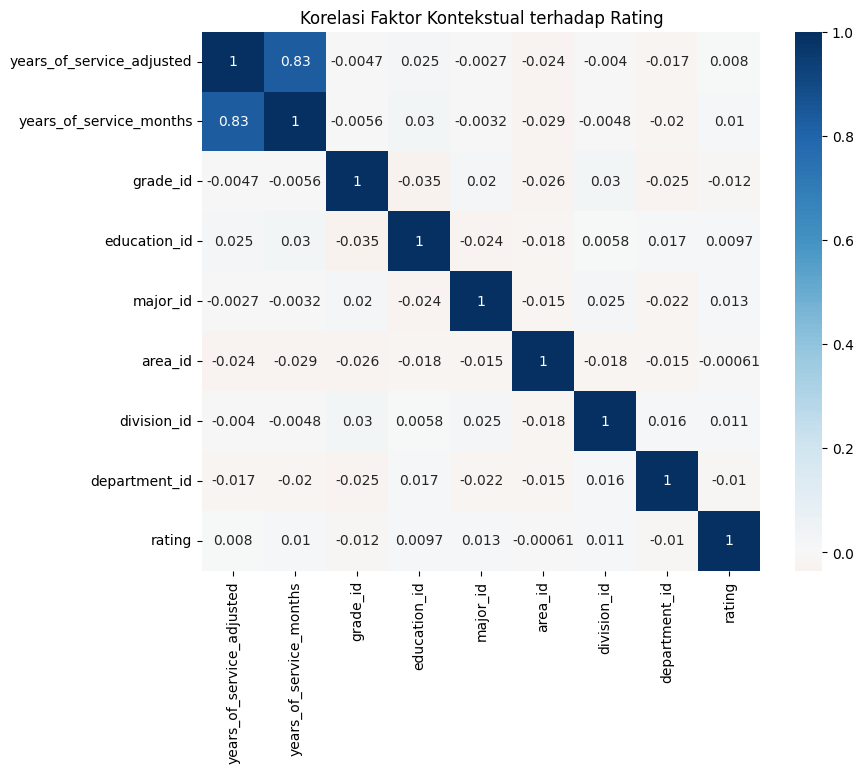

In [ ]:


corr_matrix = performance_employees[corr_vars + ['rating']].corr(numeric_only=True)

plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Korelasi Faktor Kontekstual terhadap Rating')
plt.show()

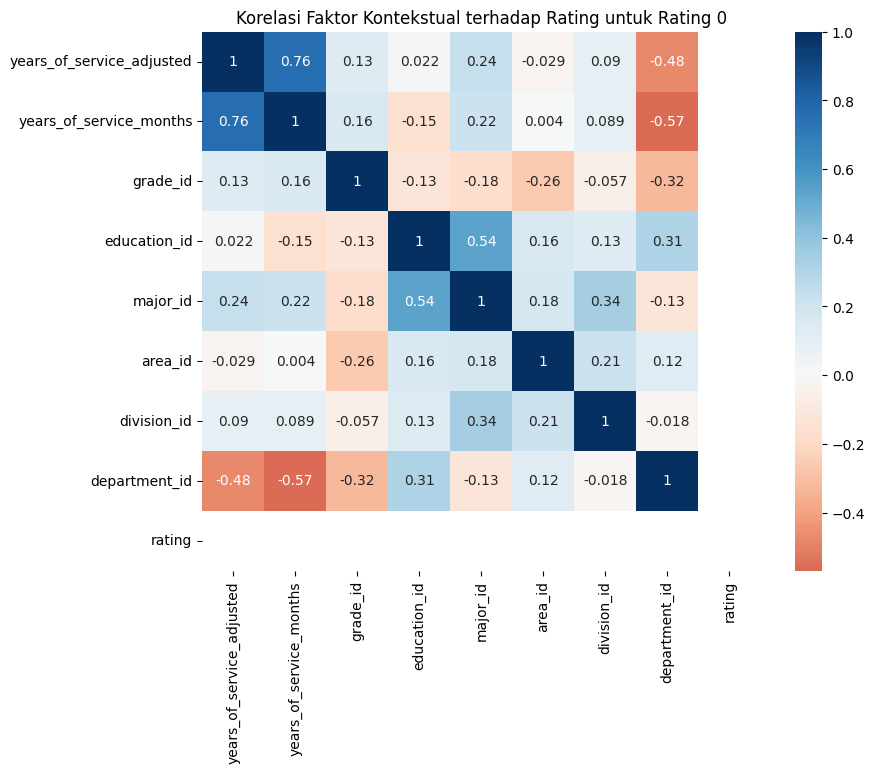

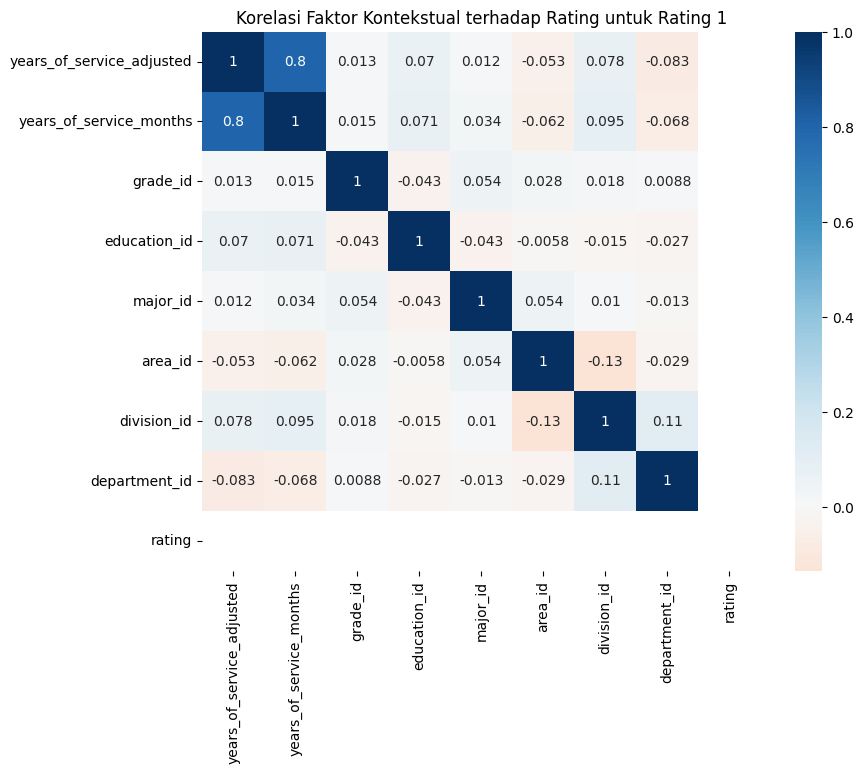

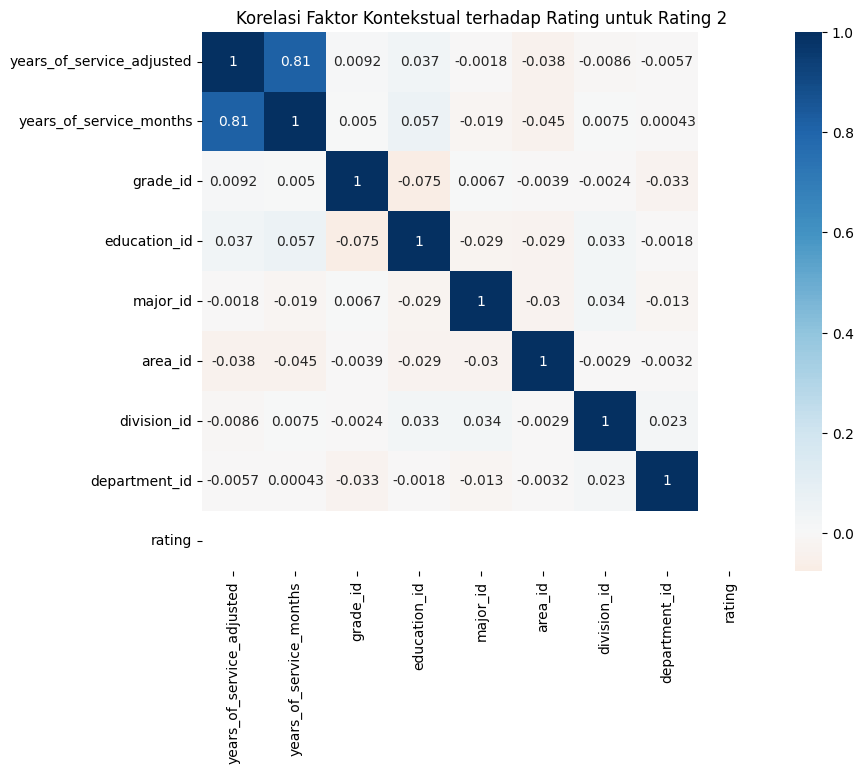

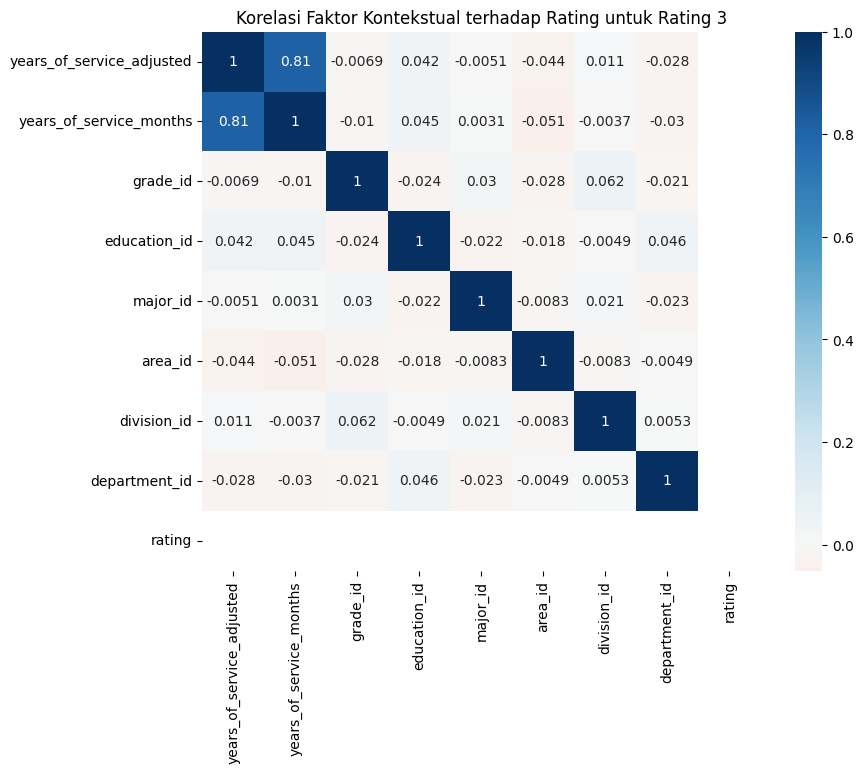

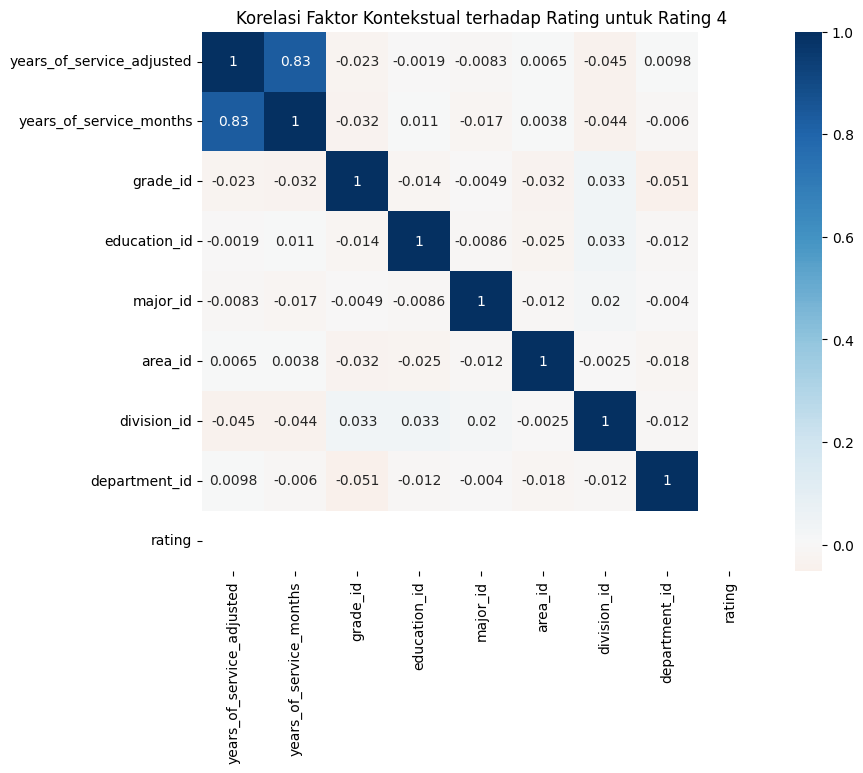

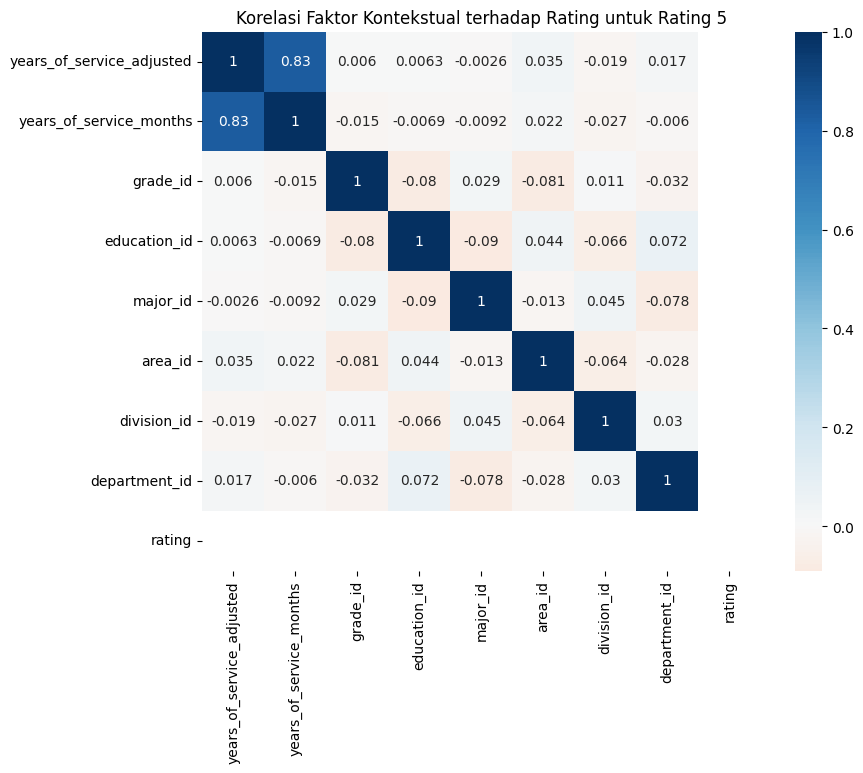

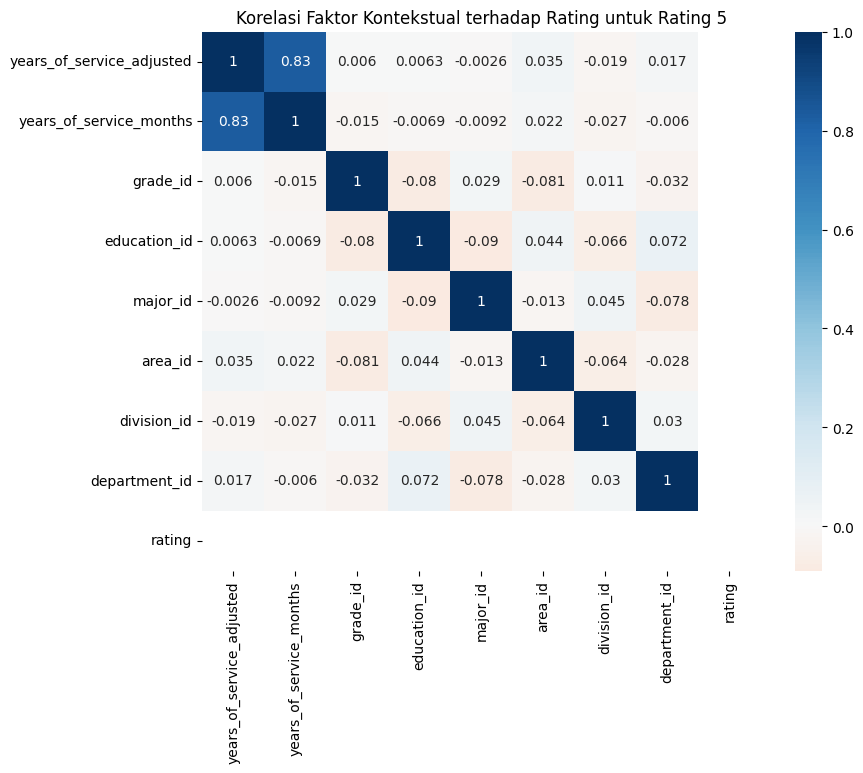

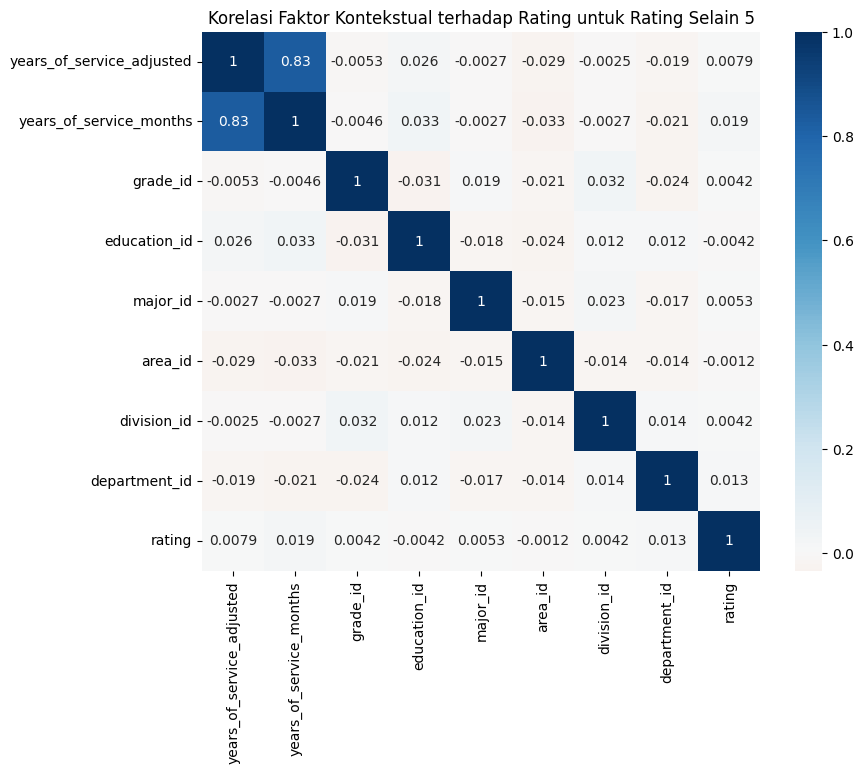

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming performance_employees is your DataFrame
# corr_vars as defined
corr_vars = [
    'years_of_service_adjusted',
    'years_of_service_months',
    'grade_id',
    'education_id',
    'major_id',
    'area_id',
    'division_id',
    'department_id',
]

# Loop through each rating (1 to 5) and create a heatmap for correlations including 'rating'
# Note: Since 'rating' is constant within each subset, correlations involving 'rating' will be NaN or 1 for self-correlation
for rating in [0, 1, 2, 3, 4, 5]:
    subset = performance_employees[performance_employees['rating'] == rating]
    corr_matrix = subset[corr_vars + ['rating']].corr(numeric_only=True)
    
    plt.figure(figsize=(9, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
    plt.title(f'Korelasi Faktor Kontekstual terhadap Rating untuk Rating {rating}')
    plt.show()

# Comparison: Rating 5 vs. Selain 5
# For Rating 5
subset_5 = performance_employees[performance_employees['rating'] == 5]
corr_matrix_5 = subset_5[corr_vars + ['rating']].corr(numeric_only=True)

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix_5, annot=True, cmap='RdBu', center=0)
plt.title('Korelasi Faktor Kontekstual terhadap Rating untuk Rating 5')
plt.show()

# For Rating Selain 5
subset_not_5 = performance_employees[performance_employees['rating'] != 5]
corr_matrix_not_5 = subset_not_5[corr_vars + ['rating']].corr(numeric_only=True)

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix_not_5, annot=True, cmap='RdBu', center=0)
plt.title('Korelasi Faktor Kontekstual terhadap Rating untuk Rating Selain 5')
plt.show()


# 2

In [ ]:
competencies_pivot = competencies.pivot_table(
    index=['employee_id', 'year'],
    columns='pillar_code',
    values='score',
    aggfunc='mean'
).reset_index()
display(competencies_pivot.head(20))

pillar_code,employee_id,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU
0,DUP1942,2021,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000
1,DUP1942,2022,3.0000,3.0000,3.0000,2.0000,2.0000,3.0000,4.0000,3.0000,3.0000,3.0000
2,DUP1942,2023,2.0000,3.0000,4.0000,3.0000,3.0000,3.0000,4.0000,4.0000,3.0000,4.0000
3,DUP1942,2024,2.0000,2.0000,2.0000,2.0000,3.0000,2.0000,2.0000,1.0000,NaN,2.0000
4,DUP1942,2025,4.0000,5.0000,5.0000,5.0000,5.0000,NaN,5.0000,5.0000,5.0000,5.0000
5,DUP2096,2021,2.0000,2.0000,3.0000,2.0000,2.0000,3.0000,3.0000,3.0000,3.0000,NaN
6,DUP2096,2022,3.0000,3.0000,3.0000,2.0000,4.0000,2.0000,3.0000,3.0000,3.0000,3.0000
7,DUP2096,2023,5.0000,NaN,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000
8,DUP2096,2024,NaN,4.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,5.0000,4.0000
9,DUP2096,2025,3.0000,3.0000,2.0000,3.0000,4.0000,3.0000,2.0000,3.0000,3.0000,3.0000


In [ ]:
df_merged = pd.merge(
    competencies_pivot,
    performance,
    on=['employee_id', 'year'],
    how='inner'
)


In [ ]:
df_merged

,employee_id,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,rating
0,DUP1942,2021,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,DUP1942,2022,3.0000,3.0000,3.0000,2.0000,2.0000,3.0000,4.0000,3.0000,3.0000,3.0000,3.0000
2,DUP1942,2023,2.0000,3.0000,4.0000,3.0000,3.0000,3.0000,4.0000,4.0000,3.0000,4.0000,3.0000
3,DUP1942,2024,2.0000,2.0000,2.0000,2.0000,3.0000,2.0000,2.0000,1.0000,NaN,2.0000,2.0000
4,DUP1942,2025,4.0000,5.0000,5.0000,5.0000,5.0000,NaN,5.0000,5.0000,5.0000,5.0000,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9754,EMP101999,2021,4.0000,3.0000,NaN,4.0000,3.0000,4.0000,4.0000,4.0000,4.0000,NaN,4.0000
9755,EMP101999,2022,2.0000,2.0000,2.0000,1.0000,2.0000,3.0000,2.0000,1.0000,2.0000,2.0000,2.0000
9756,EMP101999,2023,2.0000,2.0000,2.0000,3.0000,NaN,3.0000,4.0000,3.0000,3.0000,2.0000,3.0000
9757,EMP101999,2024,NaN,2.0000,2.0000,3.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000


In [ ]:
import pandas as pd
import numpy as np

# Misal df_merged sudah ada
# Cari baris yang memiliki 6 atau 99 (baik int maupun string) di kolom mana pun
mask_invalid = df_merged.isin([6, 99, '6', '99']).any(axis=1)

# Buat dataframe baru berisi hanya baris yang terdeteksi punya nilai tersebut
df_invalid = df_merged[mask_invalid].copy()

# Cek hasil
print("Jumlah baris yang memiliki 6 atau 99:", df_invalid.shape[0])
df_invalid


Jumlah baris yang memiliki 6 atau 99: 348


,employee_id,year,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,rating,missing_pilar_prop
49,EMP100000,2022,4.0000,2.0000,3.0000,NaN,3.0000,4.0000,99.0000,2.0000,3.0000,3.0000,3.0000,0.0909
113,EMP100013,2025,2.0000,NaN,3.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,6.0000,2.0000,0.0909
132,EMP100017,2024,3.0000,3.0000,2.0000,3.0000,3.0000,3.0000,4.0000,NaN,2.0000,2.0000,6.0000,0.0909
141,EMP100019,2023,4.0000,2.0000,3.0000,3.0000,NaN,3.0000,3.0000,2.0000,99.0000,4.0000,3.0000,0.0909
147,EMP100020,2024,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,6.0000,5.0000,4.0000,4.0000,4.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,EMP101982,2021,2.0000,3.0000,NaN,3.0000,3.0000,3.0000,NaN,3.0000,4.0000,4.0000,99.0000,0.1818
9678,EMP101983,2022,5.0000,3.0000,4.0000,99.0000,4.0000,4.0000,4.0000,4.0000,NaN,5.0000,4.0000,0.0909
9679,EMP101983,2023,4.0000,5.0000,5.0000,4.0000,3.0000,6.0000,NaN,4.0000,5.0000,NaN,4.0000,0.1818
9683,EMP101984,2022,4.0000,4.0000,4.0000,6.0000,4.0000,4.0000,3.0000,3.0000,4.0000,5.0000,4.0000,0.0000


In [ ]:
cols_with_invalid = df_merged.columns[df_merged.isin([6, 99, '6', '99']).any()]
print("Kolom yang mengandung nilai 6/99:")
print(cols_with_invalid.tolist())


Kolom yang mengandung nilai 6/99:
['CEX', 'CSI', 'FTC', 'GDR', 'IDS', 'LIE', 'QDD', 'SEA', 'STO', 'VCU', 'rating']


In [ ]:
# a. Proporsi Missing per Pilar
missing_per_pilar = df_merged[pilar_cols].isnull().mean().sort_values(ascending=False)
print("\nProporsi Missing per Pilar:\n", missing_per_pilar.apply(lambda x: f"{x:.2%}"))

# b. Proporsi Missing Rata-rata per Employee
# Hitung berapa banyak NaN dari total pilar (10 kolom) per baris
df_merged['missing_pilar_prop'] = df_merged[pilar_cols].isnull().sum(axis=1) / len(pilar_cols)
avg_missing_per_employee = df_merged.groupby('employee_id')['missing_pilar_prop'].mean()
print(f"\nMissing rata-rata per employee: {avg_missing_per_employee.mean():.2%}")

# c. Proporsi Missing per Tahun (Matriks Missing)
missing_per_year = df_merged.groupby('year')[pilar_cols].apply(lambda x: x.isnull().mean())


Proporsi Missing per Pilar:
 QDD       8.37%
rating    8.37%
CSI       8.36%
VCU       8.30%
FTC       8.25%
CEX       8.22%
STO       8.16%
LIE       8.10%
IDS       8.01%
GDR       7.60%
SEA       7.39%
dtype: object

Missing rata-rata per employee: 8.09%


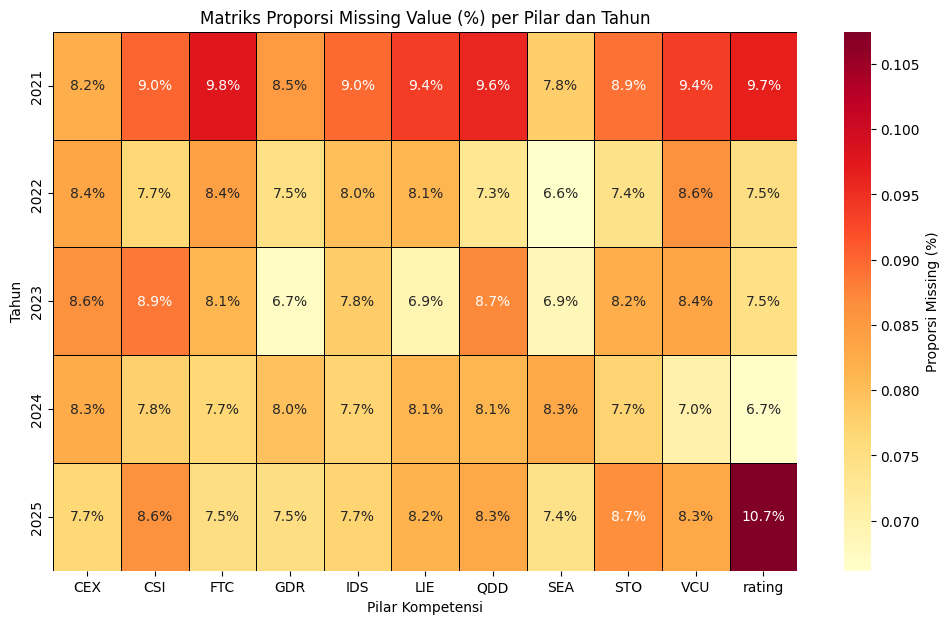

In [ ]:
plt.figure(figsize=(12, 7)) # Ukuran sedikit diperbesar karena pilar lebih banyak
# Gunakan '.values' untuk mendapatkan array proporsi (0-1)
sns.heatmap(missing_per_year, annot=True, cmap="YlOrRd", fmt=".1%",
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Proporsi Missing (%)'})
plt.title("Matriks Proporsi Missing Value (%) per Pilar dan Tahun")
plt.ylabel("Tahun")
plt.xlabel("Pilar Kompetensi")
plt.show()

In [ ]:
# lihat distribusi nilai 6 dan 99 per kolom
for c in ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']:
    print(c, df_merged[c].isin([6,99]).sum())

# cek apakah nilai 6/99 muncul pada rating tinggi atau rendah
df_merged[df_merged.isin([6,99]).any(axis=1)].rating.value_counts(normalize=True)


CEX 29
CSI 35
FTC 33
GDR 35
IDS 30
LIE 41
QDD 39
SEA 29
STO 36
VCU 29


rating
3.0000    0.3409
4.0000    0.2857
2.0000    0.1494
1.0000    0.0877
5.0000    0.0714
6.0000    0.0422
99.0000   0.0227
Name: proportion, dtype: float64


Jumlah observasi Rating = 5: 881
Jumlah observasi Rating != 5: 8878


C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


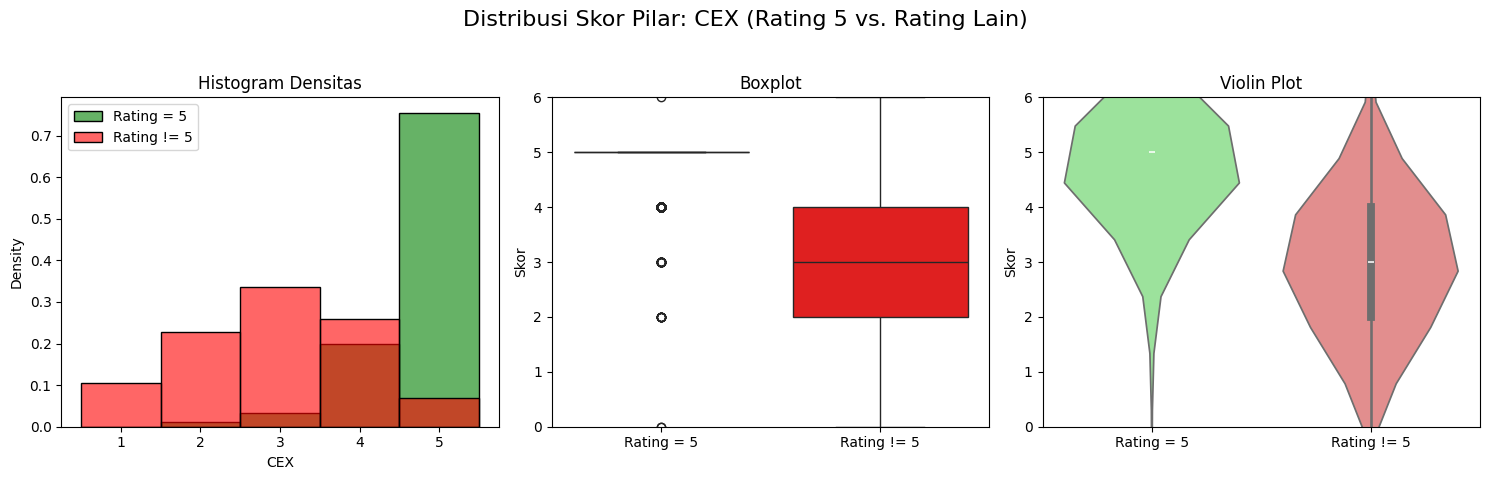

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


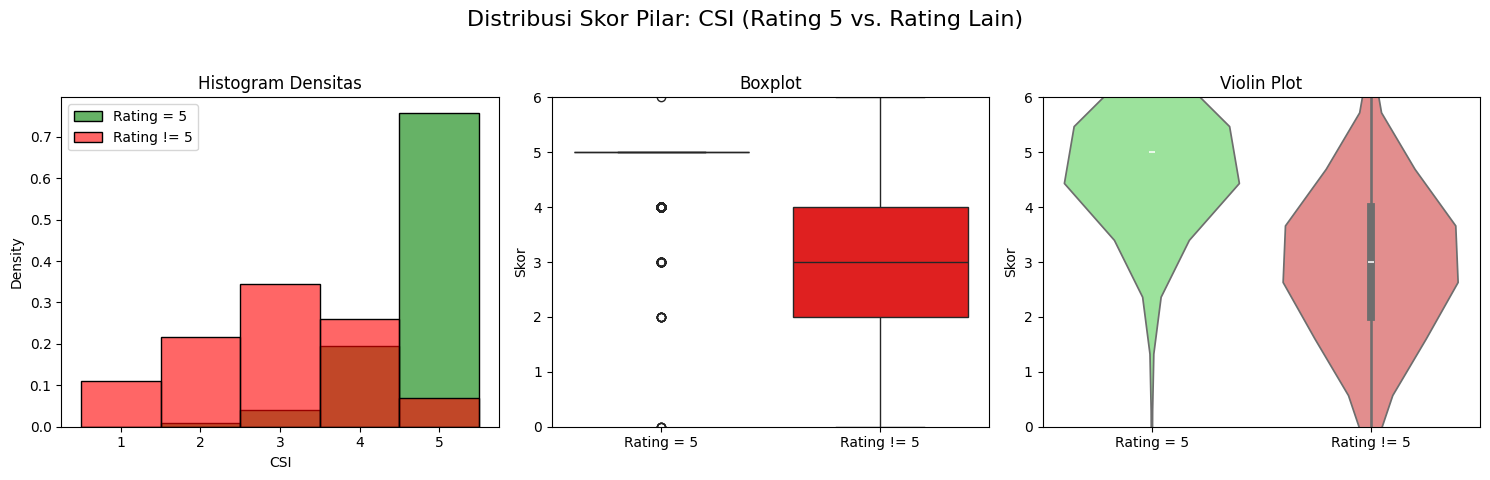

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


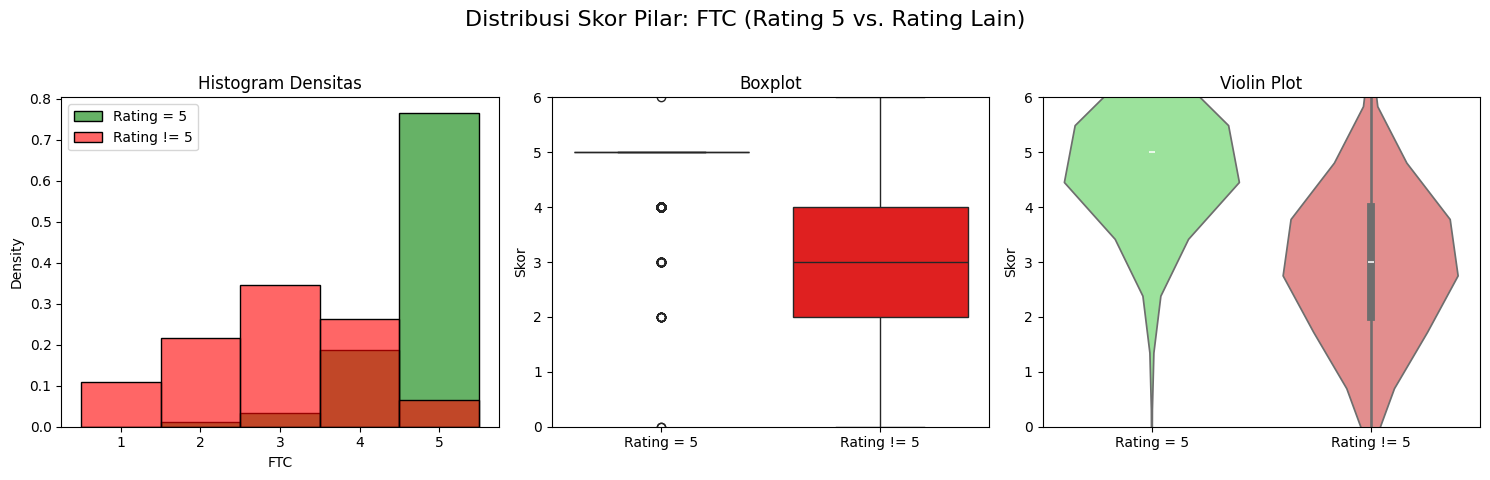

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


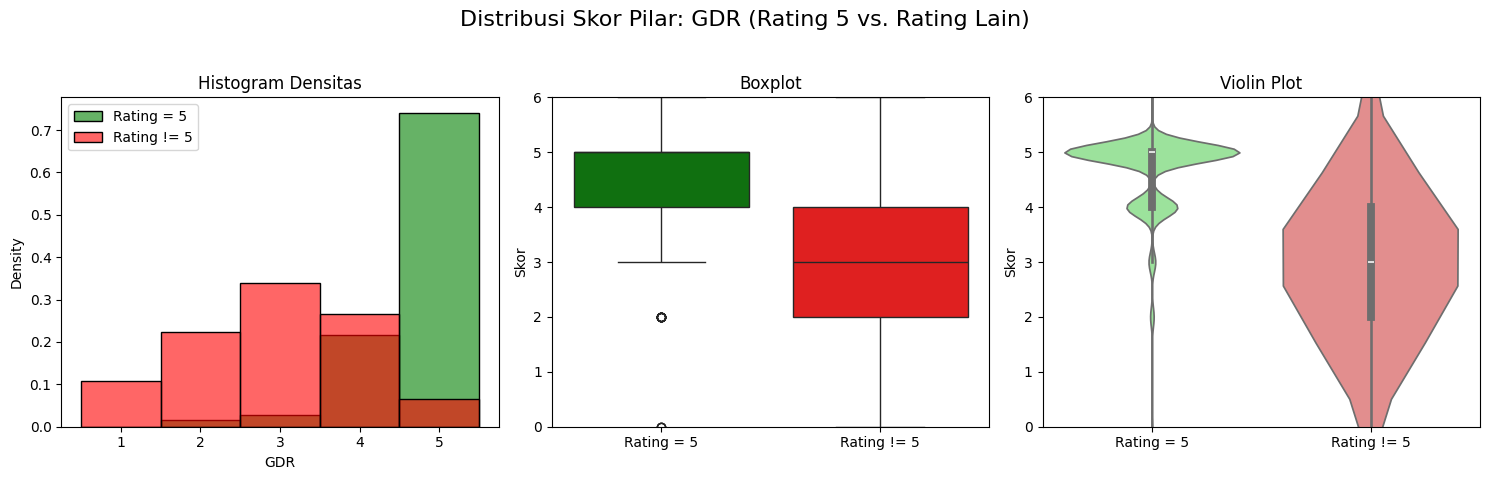

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


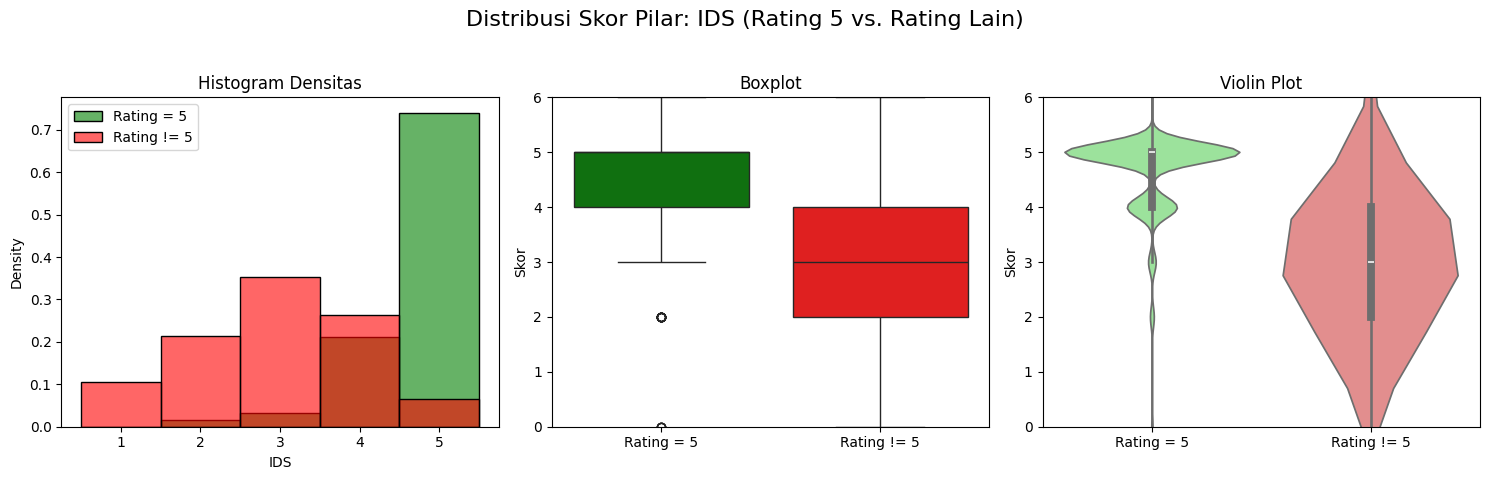

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


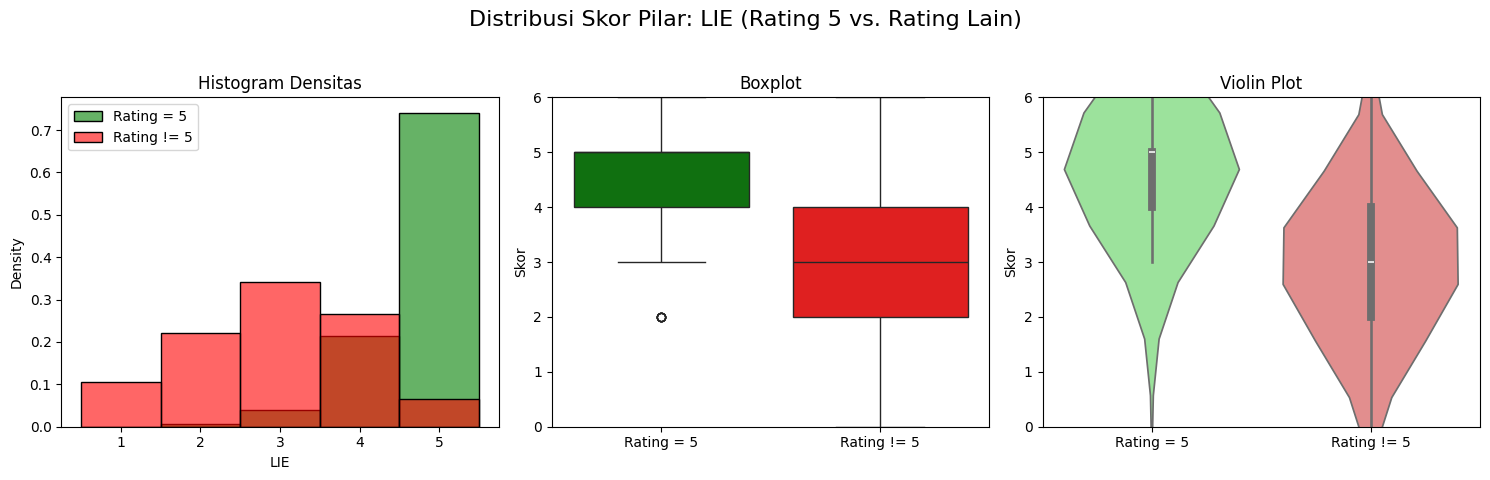

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


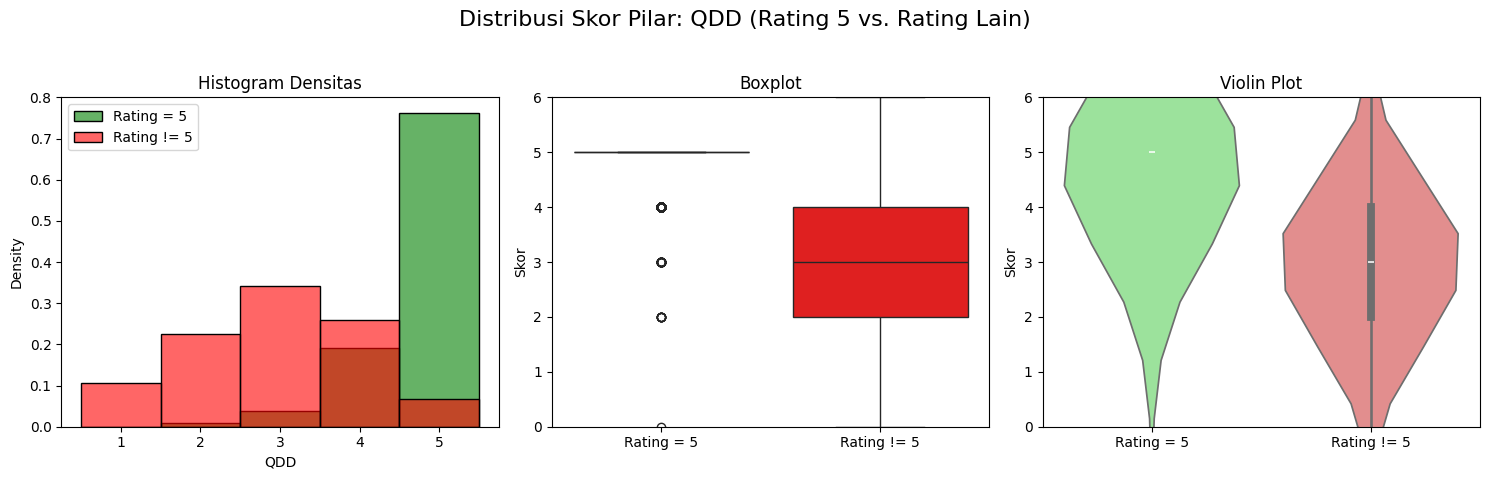

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


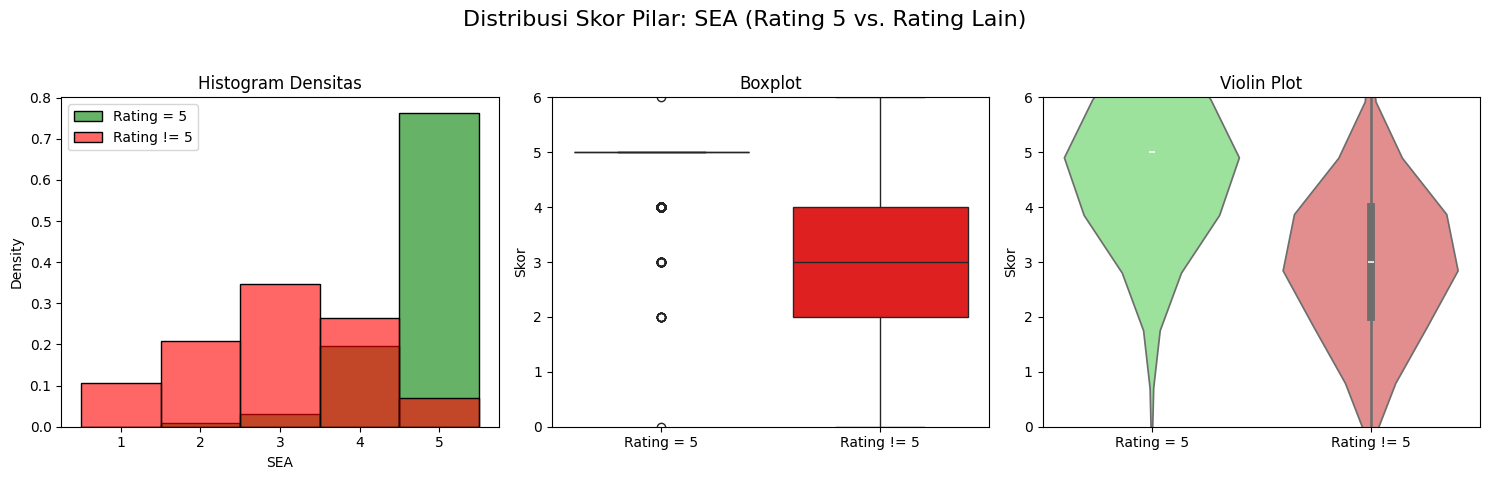

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


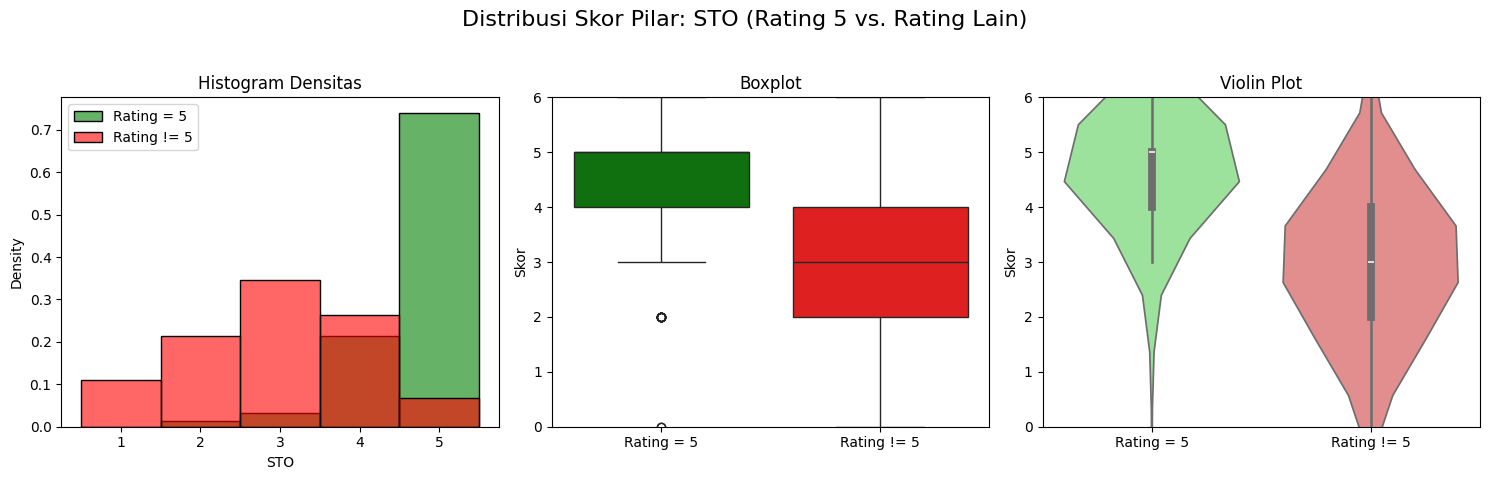

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


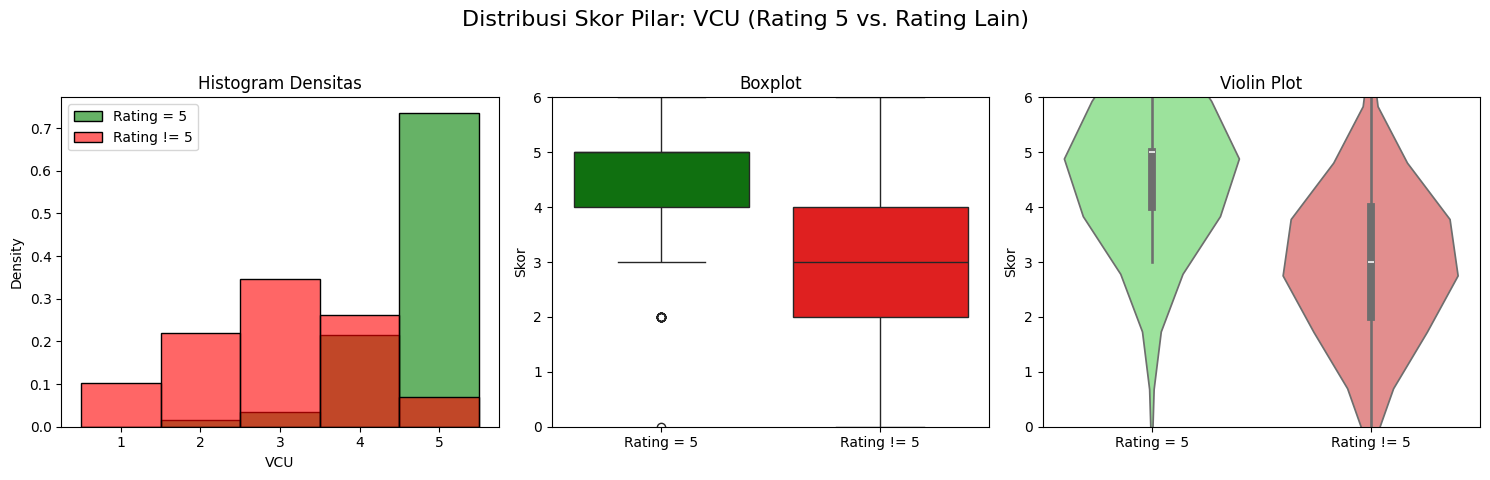

C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\4077678805.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])


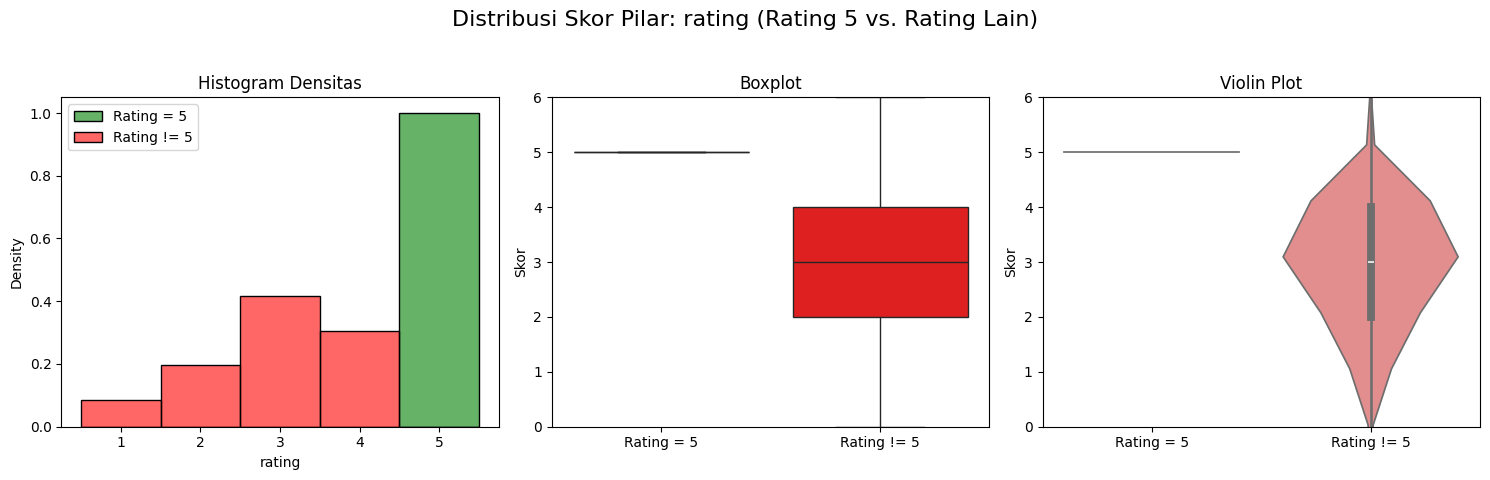

In [ ]:
# Asumsi 'rating' = 5 adalah rating terbaik/tertinggi
df_rating_5 = df_merged[df_merged[rating_col] == 5]
df_rating_not_5 = df_merged[df_merged[rating_col] != 5]

print(f"\nJumlah observasi Rating = 5: {len(df_rating_5)}")
print(f"Jumlah observasi Rating != 5: {len(df_rating_not_5)}")

# Loop untuk membuat visualisasi per pilar
for pilar in pilar_cols:
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Distribusi Skor Pilar: {pilar} (Rating 5 vs. Rating Lain)", fontsize=16)

    # Siapkan DataFrame sementara untuk Boxplot dan Violin Plot
    df_temp = pd.DataFrame({
        'Skor': pd.concat([df_rating_5[pilar], df_rating_not_5[pilar]]),
        'Rating_Group': ['Rating = 5'] * len(df_rating_5) + ['Rating != 5'] * len(df_rating_not_5)
    }).dropna()
    
    # Pastikan ada data setelah dropna
    if len(df_temp) == 0:
        print(f"Tidak ada data non-missing untuk pilar {pilar}.")
        plt.close('all')
        continue

    # 1. Histogram
    plt.subplot(1, 3, 1)
    # Gunakan bins yang relevan untuk skor (misal: range 1-5)
    bins = np.arange(0.5, 6.5, 1)
    sns.histplot(df_rating_5[pilar].dropna(), label='Rating = 5', bins=bins, color='green', alpha=0.6, stat="density", common_norm=False)
    sns.histplot(df_rating_not_5[pilar].dropna(), label='Rating != 5', bins=bins, color='red', alpha=0.6, stat="density", common_norm=False)
    plt.title("Histogram Densitas")
    plt.xticks(np.arange(1, 6))
    plt.legend()

    # 2. Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Rating_Group', y='Skor', data=df_temp, palette=['green', 'red'])
    plt.title("Boxplot")
    plt.xlabel("")
    plt.ylim(0, 6) # Batasi sumbu y agar konsisten

    # 3. Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x='Rating_Group', y='Skor', data=df_temp, palette=['lightgreen', 'lightcoral'])
    plt.title("Violin Plot")
    plt.xlabel("")
    plt.ylim(0, 6) # Batasi sumbu y agar konsisten

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
summary = df_merged.groupby(df_merged['rating'] == 5)[['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']].mean()
summary

,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU
rating,,,,,,,,,,
False,3.0978,3.1653,3.1254,3.1839,3.1327,3.1765,3.1998,3.1224,3.1643,3.1400
True,4.8027,4.7953,4.8116,4.6679,4.6535,4.9190,5.0535,4.9367,4.7821,4.8978


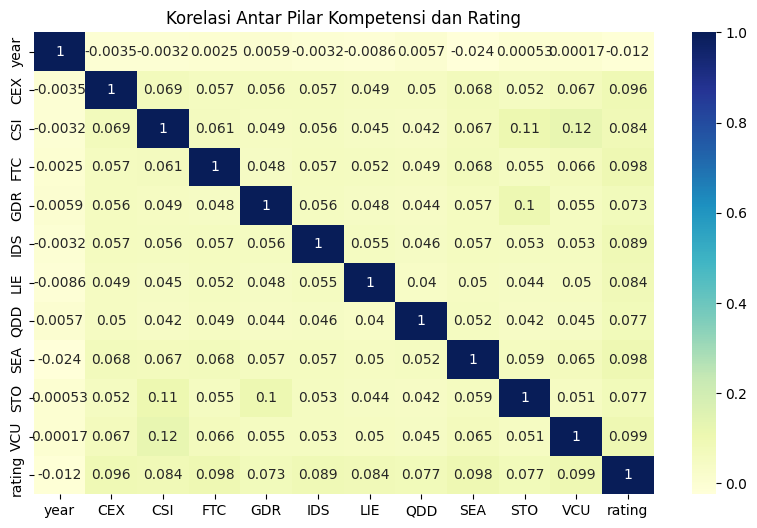

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_merged.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Korelasi Antar Pilar Kompetensi dan Rating")
plt.show()


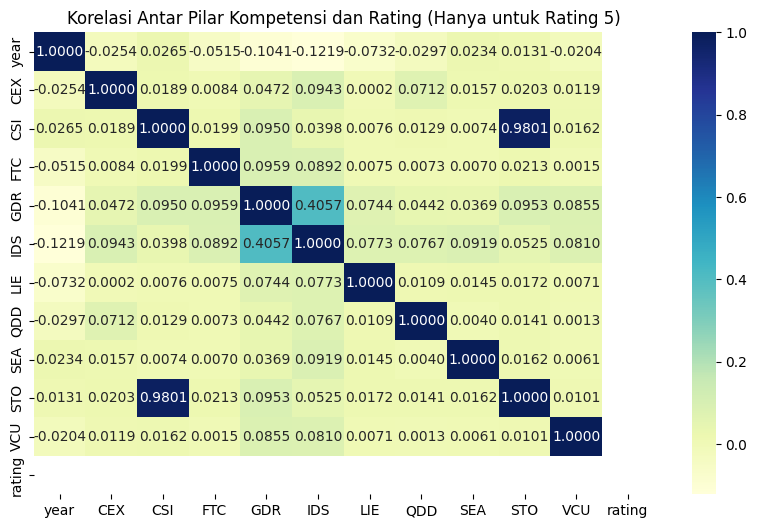

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsi df_merged sudah terdefinisi dan diisi dengan data Anda

# 1. Filter DataFrame: Hanya ambil baris dengan 'rating' = 5
df_rating_5 = df_merged[df_merged['rating'] == 5]

# 2. Hitung matriks korelasi (hanya untuk kolom numerik)
#    Perhatikan bahwa Anda harus memastikan df_rating_5 memiliki cukup variasi data
#    dan lebih dari satu kolom numerik selain 'rating' untuk korelasi yang bermakna.
correlation_matrix = df_rating_5.corr(numeric_only=True)

# 3. Buat Heatmap
plt.figure(figsize=(10,6))
# Gunakan matriks korelasi dari data yang sudah difilter
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Korelasi Antar Pilar Kompetensi dan Rating (Hanya untuk Rating 5)")
plt.show()


--- Memproses Rating: 0.0 ---


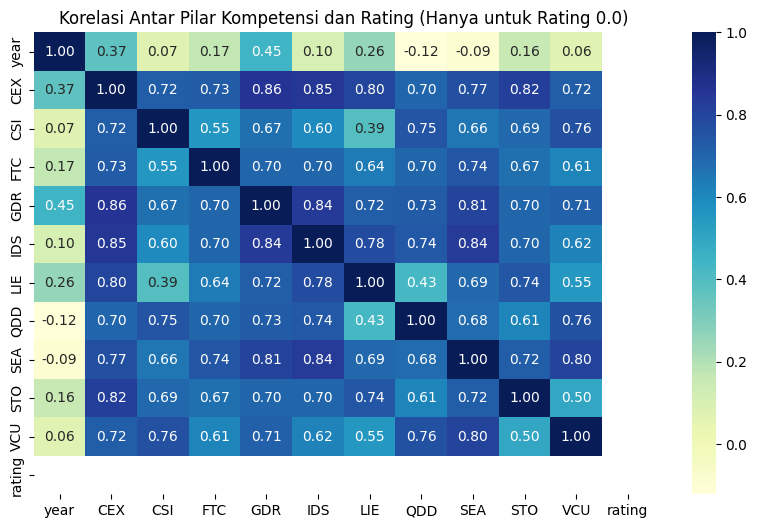


--- Memproses Rating: 1.0 ---


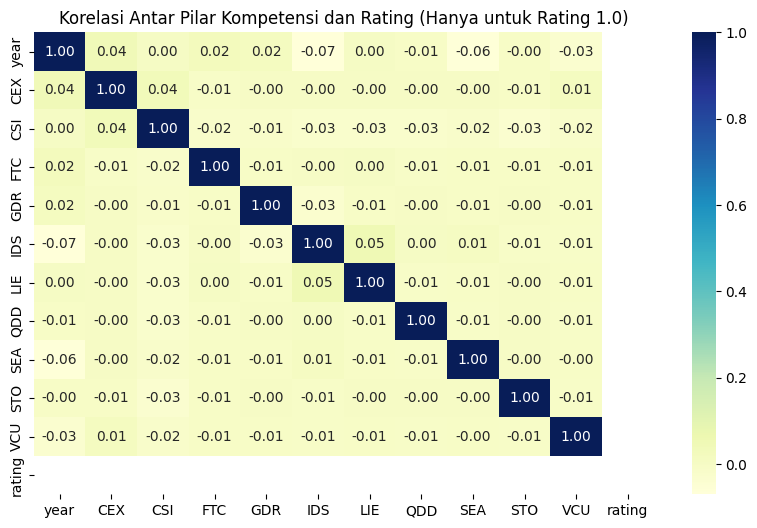


--- Memproses Rating: 2.0 ---


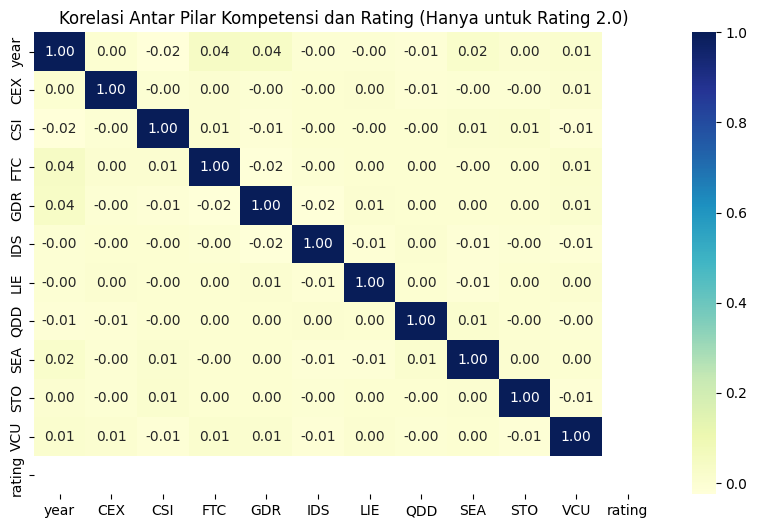


--- Memproses Rating: 3.0 ---


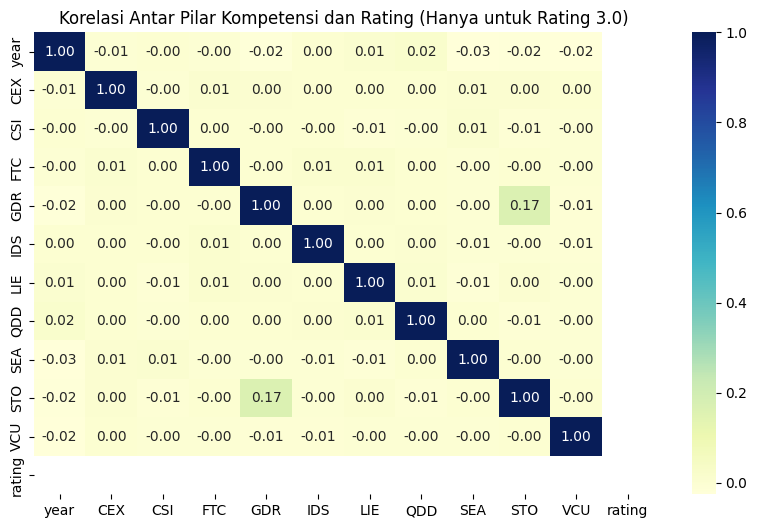


--- Memproses Rating: 4.0 ---


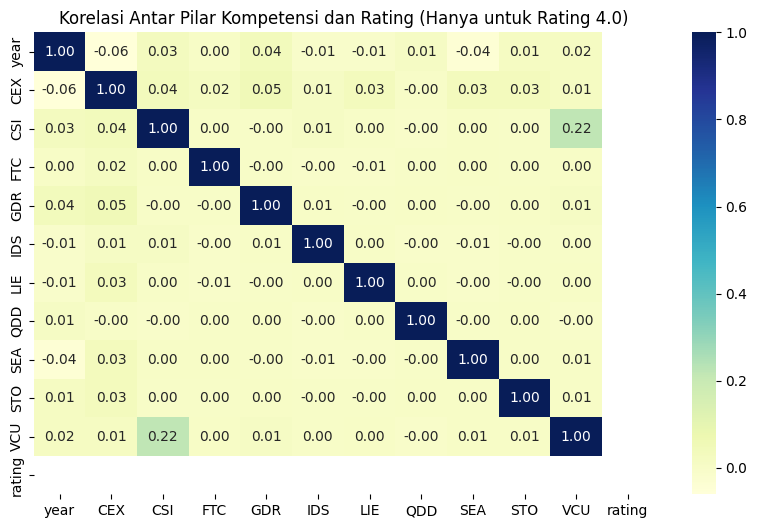


--- Memproses Rating: 5.0 ---


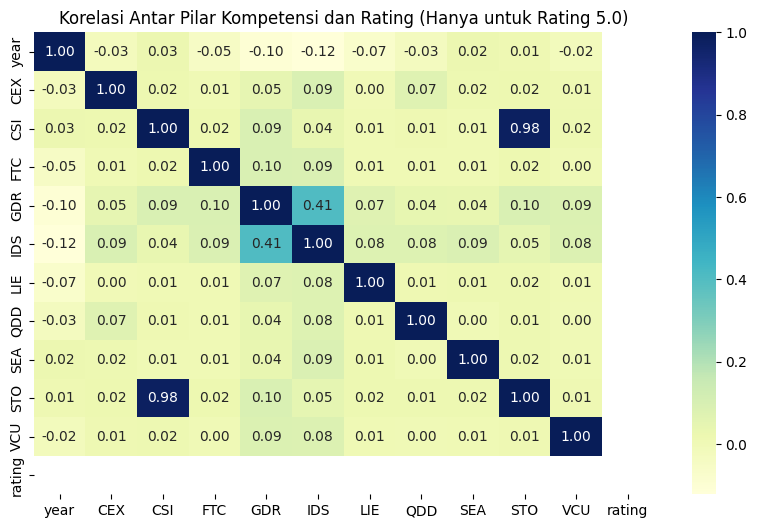


--- Memproses Rating: nan ---
Tidak cukup data (hanya 0 baris) untuk Rating nan. Melewati.

--- Memproses Rating: 6.0 ---


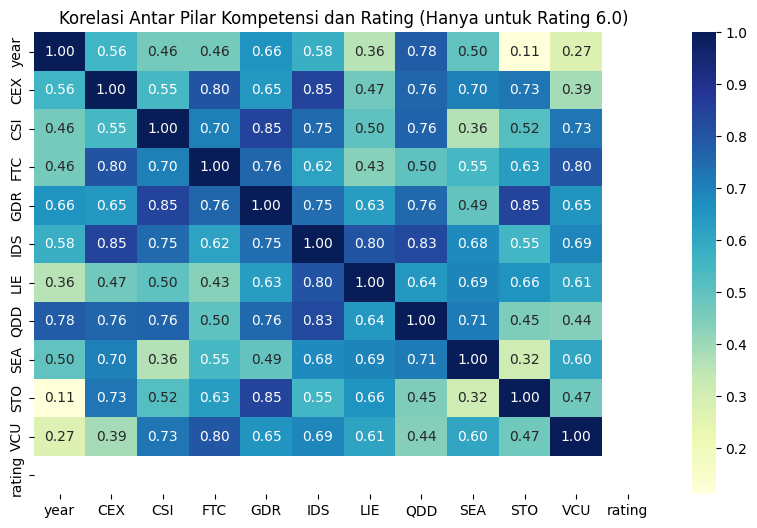


--- Memproses Rating: 99.0 ---


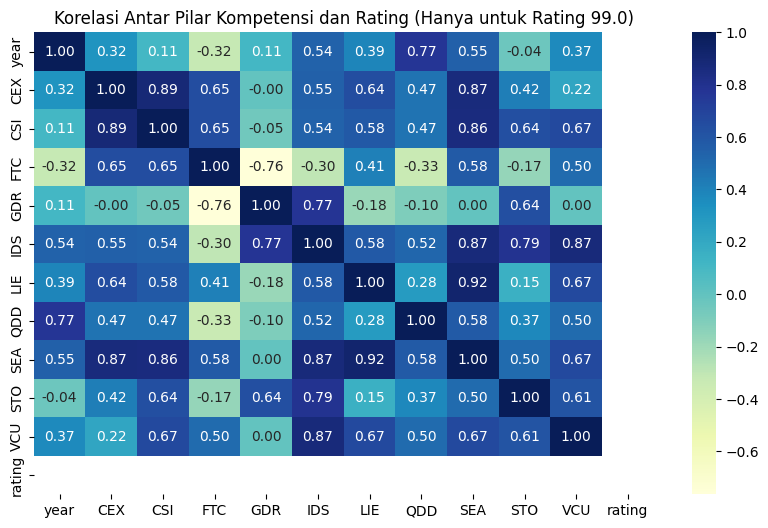

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsi df_merged sudah terdefinisi dan diisi dengan data Anda

# Dapatkan daftar rating unik yang ada di DataFrame
unique_ratings = sorted(df_merged['rating'].unique())

# Loop melalui setiap rating unik
for rating_val in unique_ratings:
    print(f"\n--- Memproses Rating: {rating_val} ---")

    # 1. Filter DataFrame untuk rating saat ini
    df_filtered = df_merged[df_merged['rating'] == rating_val]

    # Pastikan ada cukup data untuk dianalisis
    if len(df_filtered) < 2:
        print(f"Tidak cukup data (hanya {len(df_filtered)} baris) untuk Rating {rating_val}. Melewati.")
        continue

    # 2. Hitung matriks korelasi
    correlation_matrix = df_filtered.corr(numeric_only=True)

    # 3. Buat Heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"Korelasi Antar Pilar Kompetensi dan Rating (Hanya untuk Rating {rating_val})")
    plt.show()

In [ ]:
# Hitung korelasi numerik antar variabel
corr_matrix = df_merged.corr(numeric_only=True)

# Tampilkan hanya korelasi dengan 'rating', diurutkan dari yang paling tinggi
corr_with_rating = corr_matrix['rating'].sort_values(ascending=False)

print("Korelasi tiap Pilar dengan Rating:\n")
print(corr_with_rating)


Korelasi tiap Pilar dengan Rating:

rating    1.0000
VCU       0.0986
SEA       0.0980
FTC       0.0976
CEX       0.0956
IDS       0.0894
CSI       0.0842
LIE       0.0839
QDD       0.0771
STO       0.0766
GDR       0.0735
year     -0.0124
Name: rating, dtype: float64


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Asumsikan df_merged berisi data dengan kolom pilar + rating
# contoh kolom: ['employee_id', 'year', 'CEX', 'CSI', 'FTC', 'GDR', ..., 'rating']

# Tentukan kolom kompetensi (semua kecuali id, year, dan rating)
competency_cols = [col for col in df_merged.columns if col not in ['employee_id', 'year', 'rating']]

# Pisahkan grup berdasarkan rating
group_high = df_merged[df_merged['rating'] == 5]
group_other = df_merged[df_merged['rating'] != 5]

results = []

# Lakukan uji Mann–Whitney U untuk tiap kolom kompetensi
for col in competency_cols:
    data_high = group_high[col].dropna()
    data_other = group_other[col].dropna()
    
    if len(data_high) > 0 and len(data_other) > 0:
        stat, pval = mannwhitneyu(data_high, data_other, alternative='two-sided')
        results.append({
            'pillar': col,
            'mean_high': data_high.mean(),
            'mean_other': data_other.mean(),
            'diff': data_high.mean() - data_other.mean(),
            'p_value': pval
        })

# Hasil ke DataFrame
result_df = pd.DataFrame(results)

# Urutkan berdasarkan p-value terkecil (lebih signifikan)
result_df = result_df.sort_values(by='p_value', ascending=True)

# Cetak hasil
pd.set_option('display.float_format', '{:.4f}'.format)
print(result_df)


  pillar  mean_high  mean_other   diff  p_value
0    CEX     4.8027      3.0978 1.7050   0.0000
1    CSI     4.7953      3.1653 1.6299   0.0000
2    FTC     4.8116      3.1254 1.6862   0.0000
3    GDR     4.6679      3.1839 1.4840   0.0000
4    IDS     4.6535      3.1327 1.5208   0.0000
5    LIE     4.9190      3.1765 1.7425   0.0000
6    QDD     5.0535      3.1998 1.8538   0.0000
7    SEA     4.9367      3.1224 1.8143   0.0000
8    STO     4.7821      3.1643 1.6178   0.0000
9    VCU     4.8978      3.1400 1.7578   0.0000


C:\Users\fajar\AppData\Local\Temp\ipykernel_23740\3816962290.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


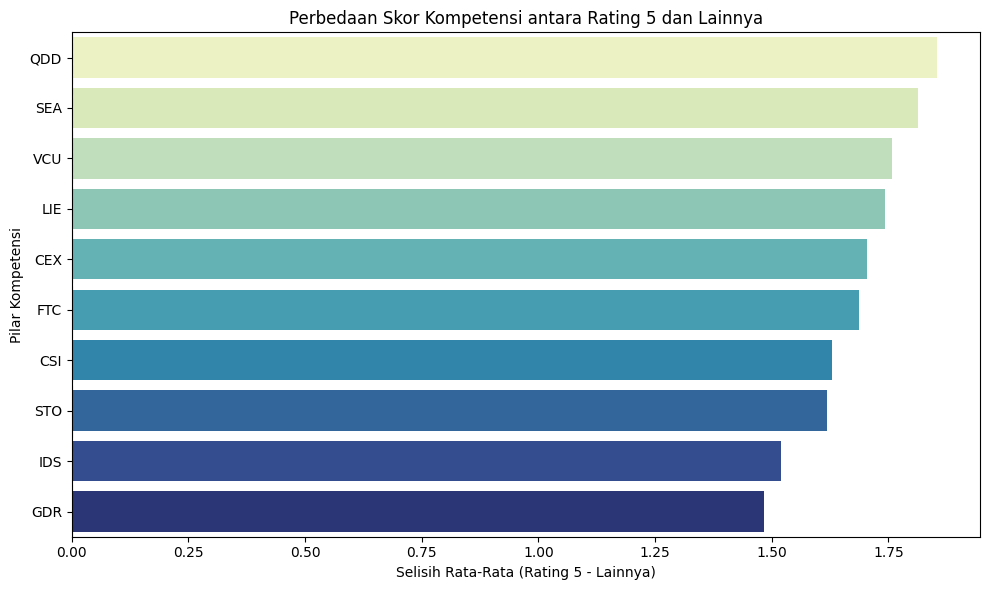

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan kolom pilar (selain ID, year, rating)
competency_cols = [col for col in df_merged.columns if col not in ['employee_id', 'year', 'rating']]

# Pisahkan grup berdasarkan rating
group_high = df_merged[df_merged['rating'] == 5]
group_other = df_merged[df_merged['rating'] != 5]

results = []

for col in competency_cols:
    data_high = group_high[col].dropna()
    data_other = group_other[col].dropna()
    if len(data_high) > 0 and len(data_other) > 0:
        stat, pval = mannwhitneyu(data_high, data_other, alternative='two-sided')
        results.append({
            'pillar': col,
            'mean_high': data_high.mean(),
            'mean_other': data_other.mean(),
            'diff': data_high.mean() - data_other.mean(),
            'p_value': pval
        })

# Hasil ke DataFrame
result_df = pd.DataFrame(results).sort_values(by='p_value', ascending=True)

# --- Visualisasi ranking pilar berdasarkan signifikansi ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=result_df,
    x='diff', y='pillar',
    palette='YlGnBu', order=result_df.sort_values('diff', ascending=False)['pillar']
)
plt.axvline(0, color='gray', linestyle='--')
plt.title('Perbedaan Skor Kompetensi antara Rating 5 dan Lainnya')
plt.xlabel('Selisih Rata-Rata (Rating 5 - Lainnya)')
plt.ylabel('Pilar Kompetensi')
plt.tight_layout()
plt.show()


In [ ]:
df_merged.dtypes


employee_id     object
year             int64
CEX            float64
CSI            float64
FTC            float64
GDR            float64
IDS            float64
LIE            float64
QDD            float64
SEA            float64
STO            float64
VCU            float64
rating         float64
dtype: object

In [ ]:
from scipy.stats import f_oneway
import numpy as np
import pandas as pd

# Gunakan hanya rating valid (1-5)
df_valid = df_merged[df_merged['rating'].isin([0,1,2,3,4,5])].copy()

pillars = ['CEX','CSI','FTC','GDR','IDS','LIE','QDD','SEA','STO','VCU']
anova_results = []

for col in pillars:
    groups = [df_valid[df_valid['rating'] == r][col].dropna() for r in range(6)]
    valid_groups = [g for g in groups if len(g) > 1]
    
    if len(valid_groups) >= 2:
        fstat, pval = f_oneway(*valid_groups)
        anova_results.append({'pillar': col, 'F-stat': fstat, 'p_value': pval})
    else:
        anova_results.append({'pillar': col, 'F-stat': np.nan, 'p_value': np.nan})

anova_df = pd.DataFrame(anova_results).sort_values('p_value')
print(anova_df)


  pillar   F-stat  p_value
0    CEX 136.2380   0.0000
7    SEA 119.3082   0.0000
1    CSI 103.4394   0.0000
2    FTC 100.3551   0.0000
9    VCU 100.0340   0.0000
4    IDS  98.6651   0.0000
5    LIE  91.0494   0.0000
3    GDR  79.4077   0.0000
8    STO  76.2957   0.0000
6    QDD  60.1782   0.0000


In [ ]:
print("Nilai unik rating:", df_merged['rating'].unique())
print("Jumlah baris per rating:")
print(df_merged['rating'].value_counts())


Nilai unik rating: [ 1.  3.  2.  5.  4. nan  6.  0. 99.]
Jumlah baris per rating:
rating
3.0000     3339
4.0000     2437
2.0000     1578
5.0000      881
1.0000      672
0.0000       15
6.0000       13
99.0000       7
Name: count, dtype: int64
